In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def read_output_data(filename):
    table = pd.read_excel(filename)
    table.loc[table.subject == 'male_A', 'subject'] = 'male'
    table.loc[table.subject == 'male_B', 'subject'] = 'male'
    table.loc[table.subject == 'female_A', 'subject'] = 'female'
    table.loc[table.subject == 'female_B', 'subject'] = 'female'
    return table.drop(columns=['tank_num', 'date'])

In [3]:
table = read_output_data('data/output_data_long_videos_PAIR_ID_corrected.xlsx'); table.head()

,pair_id,status,phase,cond,subject,app_neighbour,app_partner,fspr_neighbour,fspr_partner,cavity_neighbour,ST_neighbour,hd_neighbour,hd_partner,bars_neighbour,bars_partner,freeze_neighbour,sbend_neighbour,sbend_partner,l_partner,l_neighbour
0,1,S,habituation,control,female,0.0,1.0,2.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,121.933,52.746
1,1,S,habituation,control,male,6.0,1.0,2.0,2.0,9.0,3.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,121.933,52.746
2,1,S,experiment,control,female,12.0,1.0,27.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,10.036,0.0,0.0,44.070,0.009
3,1,S,experiment,control,male,47.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.665,0.0,0.0,120.009,0.009
4,2,F,habituation,control,female,11.0,0.0,3.0,0.0,37.0,37.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,121.933,1.933


In [4]:
table.loc[(table.cond == 'control') & (table.subject == 'female') & (table.pair_id == 2) & (table.status == 'F')]

,pair_id,status,phase,cond,subject,app_neighbour,app_partner,fspr_neighbour,fspr_partner,cavity_neighbour,ST_neighbour,hd_neighbour,hd_partner,bars_neighbour,bars_partner,freeze_neighbour,sbend_neighbour,sbend_partner,l_partner,l_neighbour
4,2,F,habituation,control,female,11.0,0.0,3.0,0.0,37.0,37.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,121.933,1.933
6,2,F,experiment,control,female,56.0,0.0,19.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,7.94,1.0,0.0,120.009,0.009


In [5]:
def get_treatments_experiments(table):
    grouped = table.groupby(['status','cond','phase','subject','pair_id']).sum().loc['F']
    return (grouped.loc['treatment'], grouped.loc['control'])

treatments, controls = get_treatments_experiments(table)

In [6]:
stats.mannwhitneyu(
    treatments.loc['habituation']['app_neighbour'], 
    treatments.loc['experiment']['app_neighbour'],
    alternative='two-sided')

MannwhitneyuResult(statistic=646.0, pvalue=0.13672426826774478)

In [7]:
stats.mannwhitneyu(
    controls.loc['habituation']['app_neighbour'], 
    controls.loc['experiment']['app_neighbour'],
    alternative='two-sided')

MannwhitneyuResult(statistic=481.0, pvalue=0.002158435030997427)

In [8]:
grouped_sum = table.groupby(['phase', 'status', 'cond', 'pair_id', 'subject']).sum()
delta = grouped_sum.loc['habituation'] - grouped_sum.loc['experiment']; delta.head()

app_neighbour  app_partner  fspr_neighbour  \
status cond    pair_id subject                                               
F      control 2       female           -45.0          0.0           -16.0   
                       male             -61.0          0.0           -10.0   
               3       female           -25.0          0.0            -9.0   
                       male             -26.0          0.0           -20.0   
               10      female            15.0         -2.0             3.0   

                                fspr_partner  cavity_neighbour  ST_neighbour  \
status cond    pair_id subject                                                 
F      control 2       female           -1.0              34.0          35.0   
                       male              0.0              14.0          14.0   
               3       female            1.0              -6.0           1.0   
                       male              0.0              -3.0          -3.0   
               10      female            0.0              -1.0         -12.0   

                                hd_neighbour  hd_partner  bars_neighbour  \
status cond    pair_id subject                                             
F      control 2       female            0.0         0.0             0.0   
                       male              2.0         0.0             0.0   
               3       female           -7.0         0.0             2.0   
                       male             -2.0         0.0             2.0   
               10      female            0.0         0.0             0.0   

                                bars_partner  freeze_neighbour  \
status cond    pair_id subject                                   
F      control 2       female            0.0            -7.940   
                       male              0.0            -7.940   
               3       female            0.0           -12.578   
                       male              0.0            -3.886   
               10      female            0.0            -3.565   

                                sbend_neighbour  sbend_partner  l_partner  \
status cond    pair_id subject                                              
F      control 2       female              -1.0            0.0      1.924   
                       male                -1.0            0.0      1.924   
               3       female               0.0            0.0      4.174   
                       male                 0.0            0.0      4.174   
               10      female               0.0            0.0      2.715   

                                l_neighbour  
status cond    pair_id subject               
F      control 2       female         1.924  
                       male          51.646  
               3       female         4.174  
                       male          23.615  
               10      female         3.269

In [9]:
delta_fs = delta.loc['F']; delta_fs
delta.to_csv('output_long_videos_before_minus_after.csv')

In [58]:
def do_test_boxplot(data, col):
    control = data.loc['control'][col]
    treatment = data.loc['treatment'][col]
    # print(f'{col}: {stats.mannwhitneyu(control, treatment)}')

    fig, ax = plt.subplots()
    # only app_neighbour has nicely laid out significance lines here
    import matplotlib.patches as patches
    props = {'connectionstyle':patches.ConnectionStyle('bar', fraction=0.1),\
             'arrowstyle':'-','shrinkA':10,'shrinkB':10,'linewidth':1}
    sig_start = max(max(control), max(treatment))
    
    ax.annotate('', xy=(1,sig_start), xytext=(2,sig_start), arrowprops=props)
    ax.annotate('**', xy=(1.5,sig_start+15))
    ax.boxplot([control, treatment], labels=['control', 'treatment'])
    ax.set(ylabel='Approaches relative to baseline')
    print(f'{ax.get_ybound()}')
    (lower, upper) = ax.get_ybound()
    ax.set_ybound((lower, upper + 20))
    
    fig.savefig(f'{heading}.pdf', format='pdf')

(-103.65, 64.65)
(-23.4, 7.4)
(-522.51045, 24.88145)
(-146.0277, 244.53170000000003)


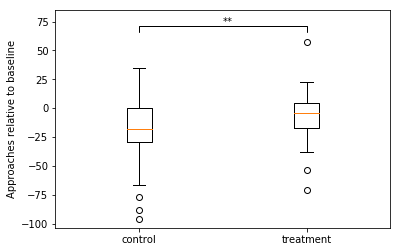

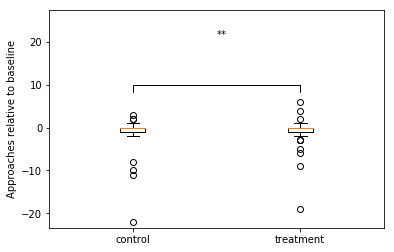

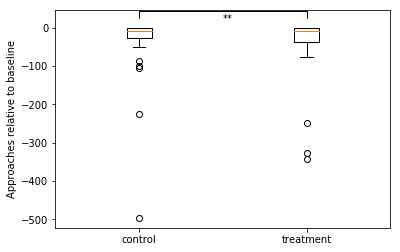

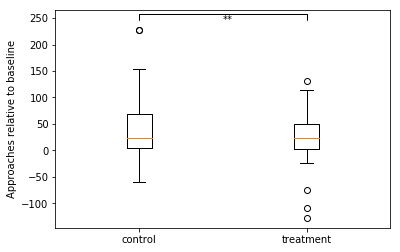

In [60]:
for heading in ['app_neighbour', 'app_partner', 'freeze_neighbour', 'l_neighbour']:
    do_test_boxplot(delta_fs, heading)

In [12]:
!jupyter nbconvert --to script "Fishy stuff t-tests-long videos-Pandas.ipynb"

[NbConvertApp] Converting notebook Fishy stuff t-tests-long videos-Pandas.ipynb to script
[NbConvertApp] Writing 2634 bytes to Fishy stuff t-tests-long videos-Pandas.py
